<a href="https://colab.research.google.com/github/suhanask/Assignments_ExcelR_Suhana/blob/main/Forecasting_cocacola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
cocacola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

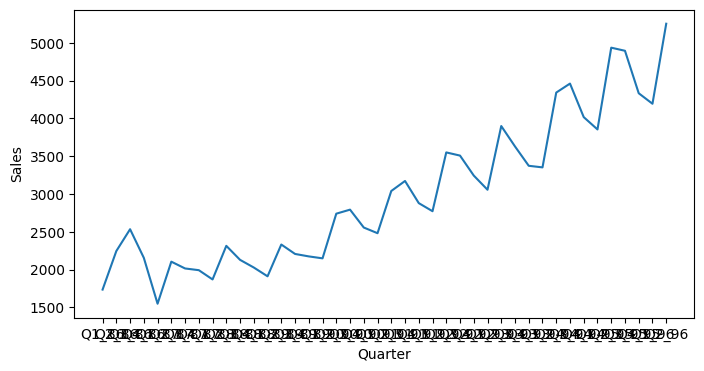

In [7]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Quarter', y='Sales', data=cocacola);

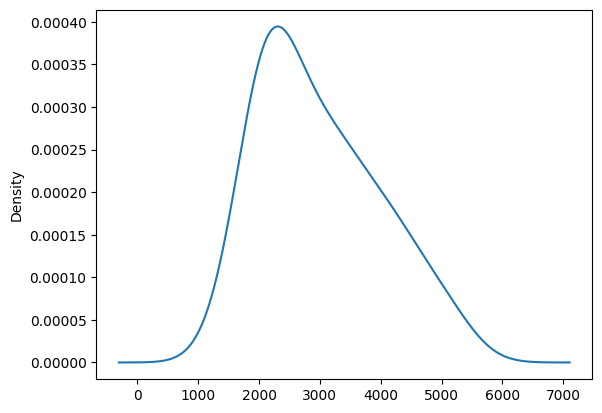

In [8]:
cocacola.Sales.plot(kind='kde');

<Axes: >

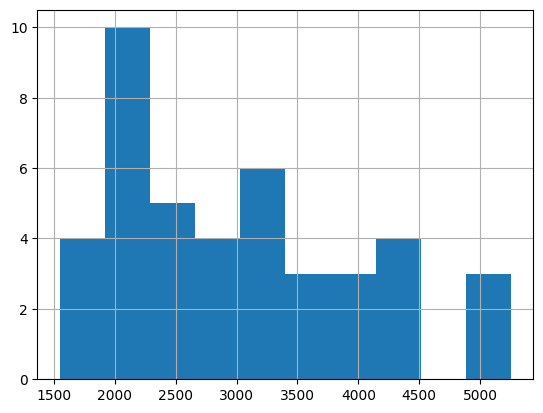

In [9]:
cocacola.Sales.hist()

<ipython-input-10-18923ec1e8f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cocacola['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

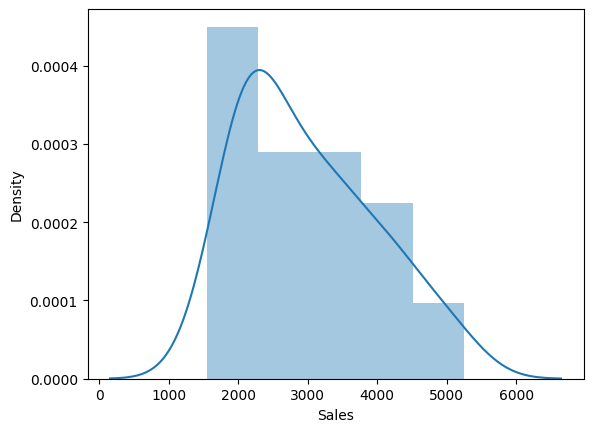

In [10]:
sns.distplot(cocacola['Sales'])

In [11]:
quarter=['Q1','Q2','Q3','Q4']
cocacola['quarter']=0
cocacola['Year']=0

In [12]:
for i in range(42):
    n=cocacola['Quarter'][i]
    cocacola['quarter'][i]=n[0:2]
    cocacola['Year'][i]=n[3:5]

<ipython-input-12-b3c0d34214b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['quarter'][i]=n[0:2]
<ipython-input-12-b3c0d34214b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['Year'][i]=n[3:5]


In [13]:
cocacola['Year']= pd.to_numeric(cocacola['Year'])
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   quarter  42 non-null     object 
 3   Year     42 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


<Axes: xlabel='Year', ylabel='Sales'>

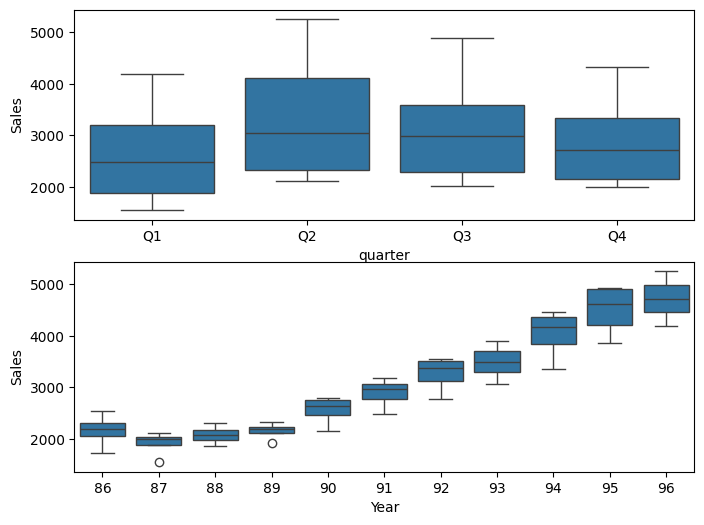

In [14]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x= 'quarter', y= 'Sales', data=cocacola)
plt.subplot(212)
sns.boxplot(x= 'Year', y= 'Sales', data=cocacola)

<Axes: xlabel='quarter', ylabel='Year'>

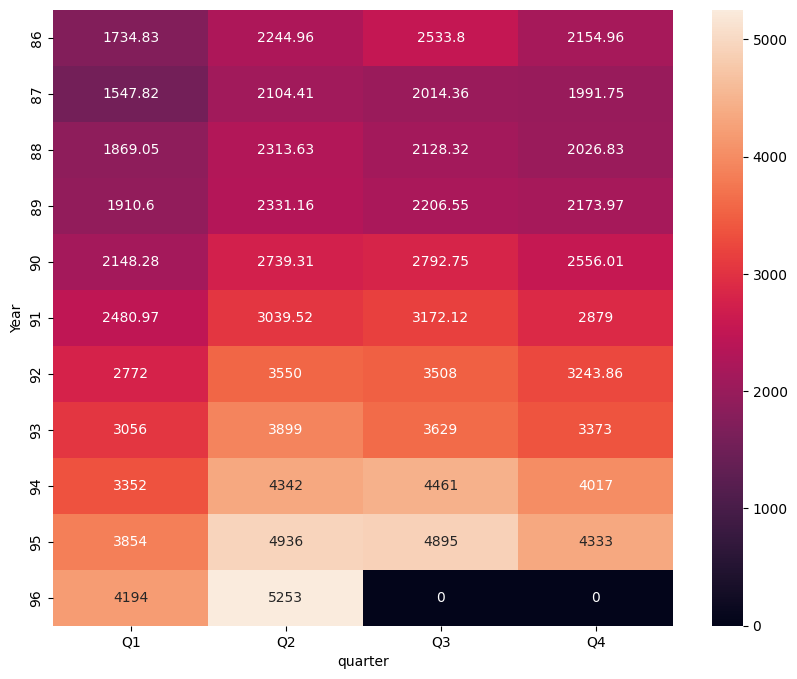

In [15]:
plt.figure(figsize=(10,8))
heatmap_pivot = pd.pivot_table( data=cocacola, values='Sales', index='Year', columns='quarter', aggfunc='mean', fill_value=0)
sns.heatmap(heatmap_pivot, annot=True, fmt='g')

In [16]:
quarter_dummies = pd.get_dummies(cocacola['quarter'])
quarter_dummies.head(5)

,Q1,Q2,Q3,Q4
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False


In [17]:
cocacola1 = pd.concat([cocacola,quarter_dummies], axis=1)
cocacola1.head()

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,True,False,False,False
1,Q2_86,2244.960999,Q2,86,False,True,False,False
2,Q3_86,2533.804993,Q3,86,False,False,True,False
3,Q4_86,2154.962997,Q4,86,False,False,False,True
4,Q1_87,1547.818996,Q1,87,True,False,False,False


In [18]:
cocacola1['t']=np.arange(1,43)
cocacola1['t_square']=cocacola1['t']*cocacola1['t']
cocacola1['log_sales']=np.log(cocacola1['Sales'])

In [19]:
cocacola1.head()

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,86,True,False,False,False,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,False,True,False,False,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,False,False,True,False,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,False,False,False,True,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,True,False,False,False,5,25,7.344602


In [20]:
Train = cocacola1.head(30)
Test = cocacola1.tail(12)

In [21]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [22]:
linear_model = smf.ols('Sales~t',Train).fit()
pred_linear = linear_model.predict(Test)
rmse_linear = np.sqrt(mean_squared_error(Test['Sales'], pred_linear))
rmse_linear

714.0144483281299

In [23]:
quad_model = smf.ols('Sales~t+t_square',data=Train).fit()
pred_quad = quad_model.predict(Test)
rmse_quad = np.sqrt(mean_squared_error(Test['Sales'], pred_quad))
rmse_quad

646.2715428311304

In [24]:
exp_model = smf.ols('log_sales~t',data=Train).fit()
pred_exp = exp_model.predict(Test)
rmse_exp = np.sqrt(mean_squared_error(Test['Sales'],np.exp(pred_exp)))
rmse_exp

552.2821039079217

In [25]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = add_sea.predict(Test)
rmse_add_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea))
rmse_add_sea

1778.0065467941365

In [26]:
add_sea_quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = add_sea_quad.predict(Test)
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea_quad))
rmse_add_sea_quad

586.0533067869516

In [27]:
mult_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_mult_sea = mult_sea.predict(Test)
rmse_mult_sea = np.sqrt(mean_squared_error(Test['Sales'], np.exp(pred_mult_sea)))
rmse_mult_sea

1828.923891213813

In [28]:
mult_add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data=Train).fit()
pred_mult_add_sea = mult_add_sea.predict(Test)
rmse_mult_add_sea = np.sqrt(mean_squared_error(Test['Sales'], np.exp(pred_mult_add_sea)))
rmse_mult_add_sea

410.2497059602418

In [29]:
data= pd.DataFrame({'Model':(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea","rmse_mult_add_sea"]),
                    'RMSE value': ([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])})
data.sort_values('RMSE value')

,Model,RMSE value
6,rmse_mult_add_sea,410.249706
1,rmse_exp,552.282104
4,rmse_add_sea_quad,586.053307
2,rmse_quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_mult_sea,1828.923891


In [30]:
Final_model = smf.ols('log_sales~t+Q1+Q2+Q3',data=cocacola1).fit()

In [31]:
new_data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(new_data)
forecast = pd.DataFrame(new_data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [32]:
dummies = pd.get_dummies(forecast['quarter'])

In [33]:
forecast_cocacola = pd.concat([forecast,dummies], axis=1)
forecast_cocacola['t']= np.arange(1,5)
forecast_cocacola['t_square']= forecast_cocacola['t']*forecast_cocacola['t']
forecast_cocacola

,Quarter,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q3_96,Q3,False,False,True,False,1,1
1,Q4_96,Q4,False,False,False,True,2,4
2,Q1_97,Q1,True,False,False,False,3,9
3,Q2_97,Q2,False,True,False,False,4,16


In [34]:
pred_final =Final_model.predict(forecast_cocacola)
forecasted_sales = np.exp(pred_final)
forecasted_sales

0    1850.097087
1    1707.728369
2    1615.755820
3    2055.102678
dtype: float64

In [35]:
forecast_cocacola['forecasted_sales']= pd.DataFrame(forecasted_sales)
forecast_cocacola

,Quarter,quarter,Q1,Q2,Q3,Q4,t,t_square,forecasted_sales
0,Q3_96,Q3,False,False,True,False,1,1,1850.097087
1,Q4_96,Q4,False,False,False,True,2,4,1707.728369
2,Q1_97,Q1,True,False,False,False,3,9,1615.755820
3,Q2_97,Q2,False,True,False,False,4,16,2055.102678
